In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import statsmodels.api as sm
%matplotlib inline

In [32]:
def mallinna(malli):
    
    # Mallin sovitus opetusdataan
    malli.fit(X_train, y_train)
            
    # Selityskerroin opetusdatalle
    y_pred_train = malli.predict(X_train)
    R2_train_malli = malli.score(X_train, y_train)
        
    # Selityskerroin testidatalle
    y_pred_test = malli.predict(X_test)
    R2_test_malli = malli.score(X_test, y_test)
        
    # Selityskertoimien tulostus
    print(f'Opetusdatan selityskerroin {R2_train_malli:.3f}')
    print(f'Testidatan selityskerroin {R2_test_malli:.3f}')
       
    # Opetusdatan virhetermit kaaviona
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    ax[0].set_title('Ennustevirheiden jakauma opetusdatassa')
    sns.histplot((y_train-y_pred_train), kde=True, ax=ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    
    # toteutuneet ja ennustetut hajontakaaviona testidatalle
    ax[1].set_title('Toteutuneet ja ennustetut testidatassa')
    ax[1].scatter(x=y_test, y=y_pred_test)
    ax[1].set_xlabel('toteutunut')
    ax[1].set_ylabel('ennuste')

In [33]:
from datetime import datetime
print(f'Päivitetty {datetime.now()}')

Päivitetty 2023-04-26 22:59:26.503786


In [34]:
# Ladataan data
df = pd.read_excel('https://taanila.fi/Concrete_Data.xlsx')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [36]:
df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [37]:
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


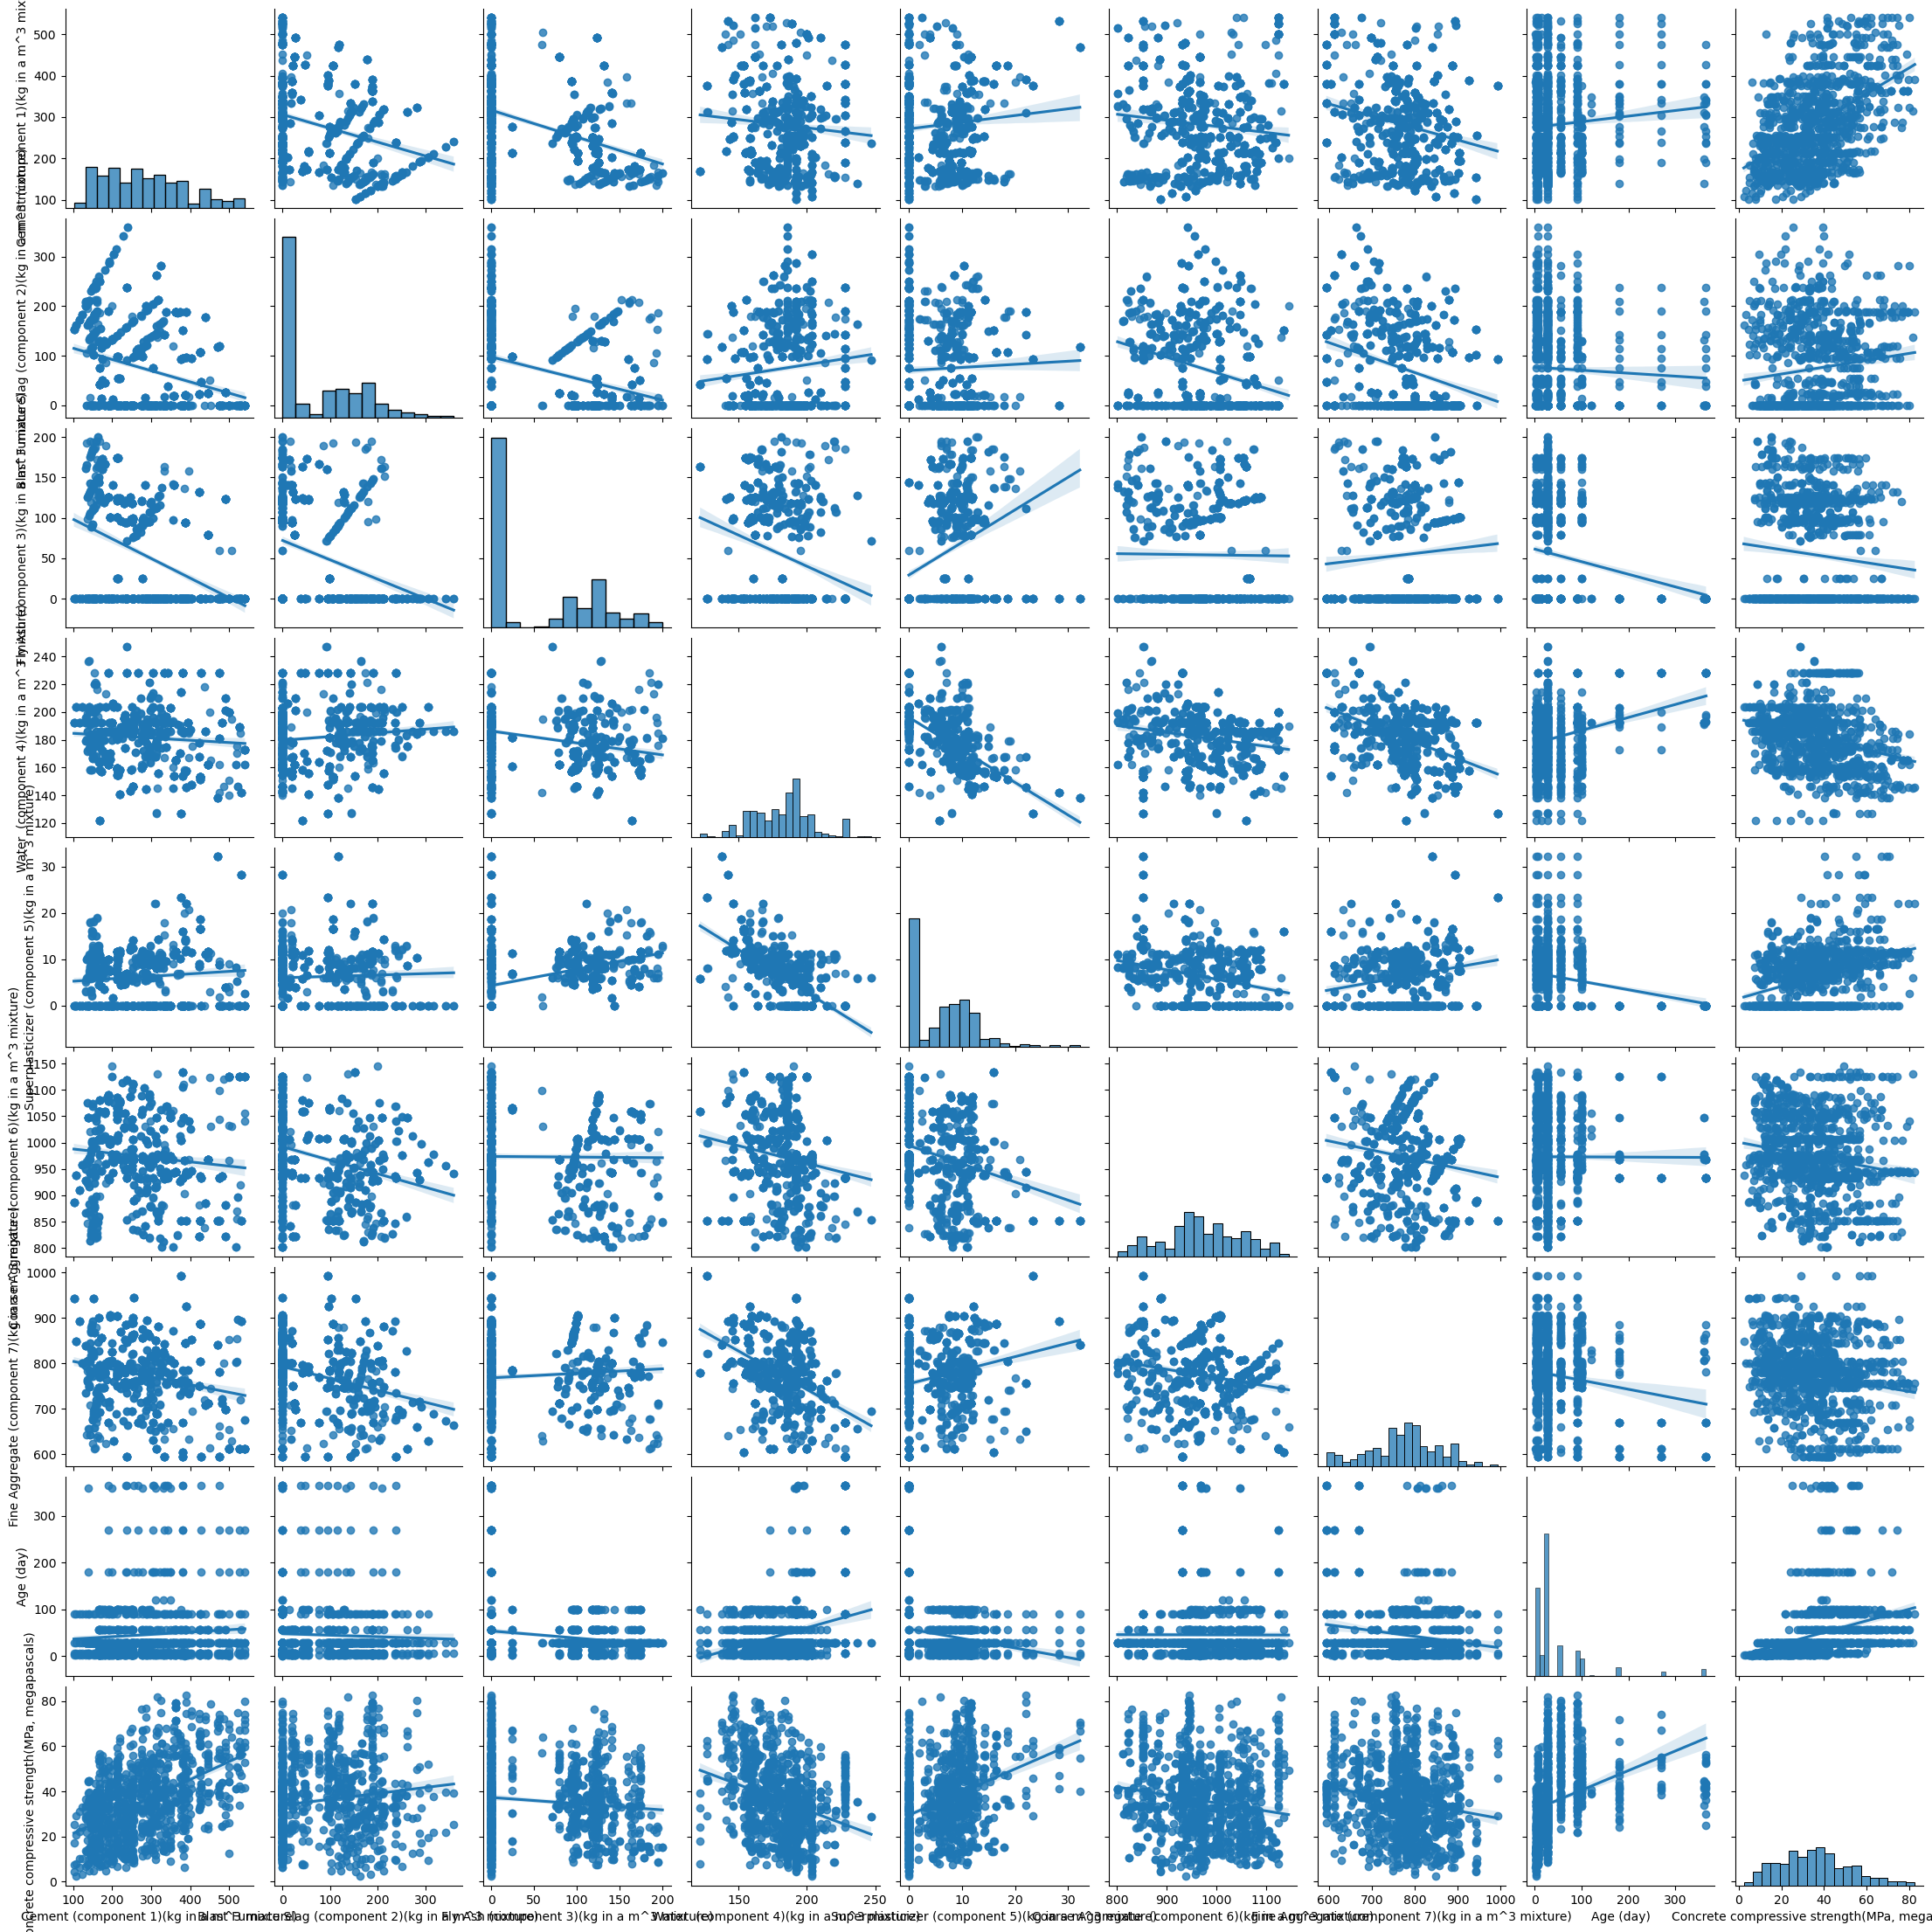

In [41]:
sns.pairplot(df, kind = 'reg')

<Axes: >

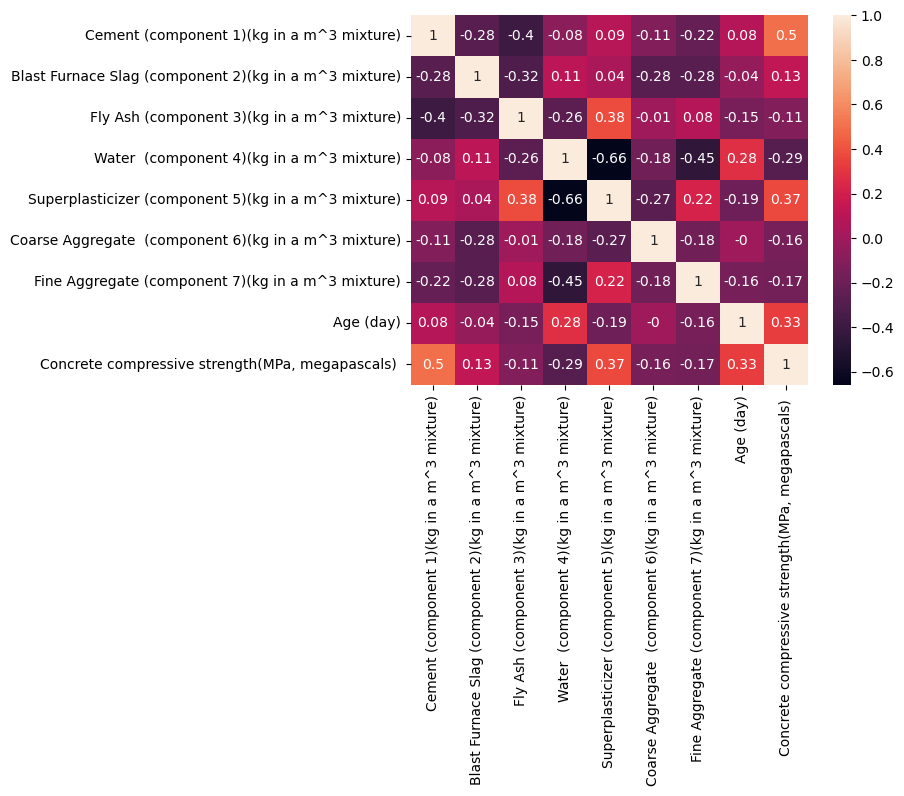

In [42]:
# Riippuvuuksien tarkastelua korrelaatiokertoimien avulla
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [3]:
# Määritellään X ja y
X = df.drop('Concrete compressive strength(MPa, megapascals) ', axis=1)
y = df['Concrete compressive strength(MPa, megapascals) ']

Opetusdatan selityskerroin 0.610
Testidatan selityskerroin 0.628


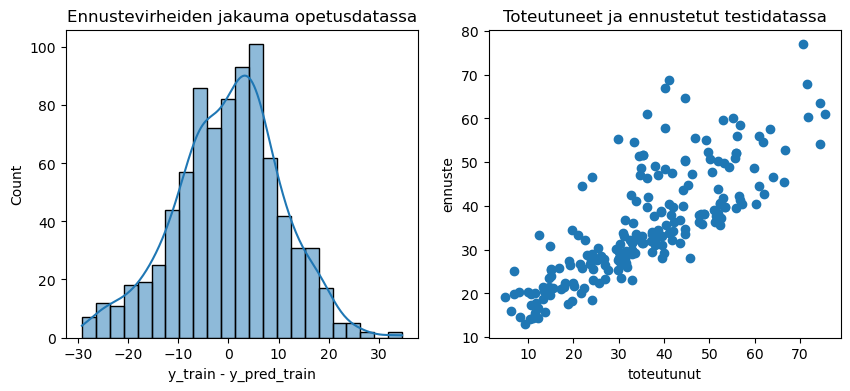

In [43]:
malli = LinearRegression()

# Tässä hyödynnän aiemmin määriteltyä mallinna-funktiota
mallinna(malli)

Opetusdatan selityskerroin 0.987
Testidatan selityskerroin 0.879


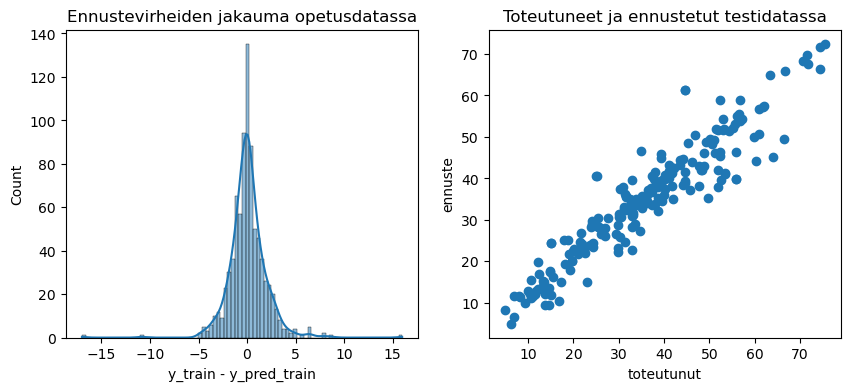

In [44]:
malli = RandomForestRegressor()
mallinna(malli)

Opetusdatan selityskerroin 0.950
Testidatan selityskerroin 0.881


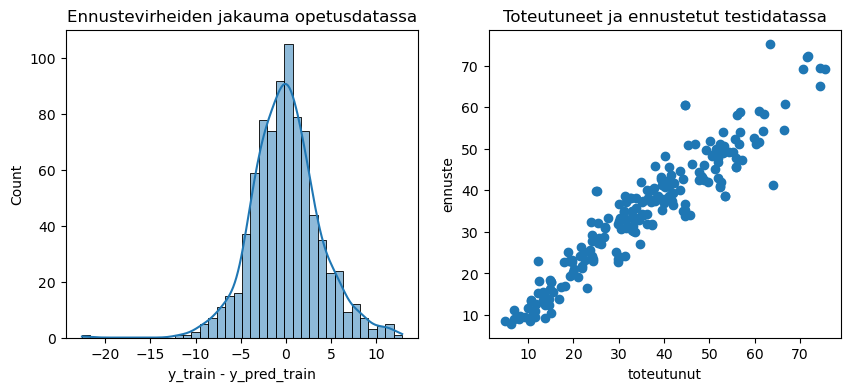

In [46]:
malli = GradientBoostingRegressor()
mallinna(malli)

In [ ]:
#Selkeästi GradientBoostingRegressor tarjoaa 0.881 tarkkuudella parhaimman tarkkuuden.

In [4]:
# Jaetaan data opetus- ja testijoukkoihin
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Lineaarinen regressio
linreg = LinearRegression()

linreg.fit(X_train, y_train)
linreg_preds = linreg.predict(X_test)

In [6]:
#Mallin arviointi
mse = mean_squared_error(y_test, linreg_preds)
rmse = mse**0.5
r2 = r2_score(y_test, linreg_preds)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R2-score:", r2)

Mean Squared Error (MSE): 95.97548435337706
Root Mean Squared Error (RMSE): 9.796707832398447
R2-score: 0.6275416055429021


In [7]:
# Tulostetaan lineaarisen regression kertoimet
coefficients = pd.DataFrame(linreg.coef_, X.columns, columns=['Coefficient'])
print("\nKertoimet:")
print(coefficients)


Kertoimet:
                                                    Coefficient
Cement (component 1)(kg in a m^3 mixture)              0.118975
Blast Furnace Slag (component 2)(kg in a m^3 mi...     0.108518
Fly Ash (component 3)(kg in a m^3 mixture)             0.082169
Water  (component 4)(kg in a m^3 mixture)             -0.135712
Superplasticizer (component 5)(kg in a m^3 mixt...     0.308732
Coarse Aggregate  (component 6)(kg in a m^3 mix...     0.017804
Fine Aggregate (component 7)(kg in a m^3 mixture)      0.024061
Age (day)                                              0.116444


In [48]:
# Parhaimmat kolme ovat: 1. Superplasticizer 2.Cement 3.Age 
# huonoimmat: 1. Water, 2. Fly Ash ja 3. Coarse Aggregate

In [ ]:
# Mallin arvioinnista saadaan selville, että malli on kohtalaisen hyvä selittämään betonin lujuutta.
# Kertoimista voidaan nähdä, kuinka paljon selittävät muuttujat vaikuttavat betonin lujuuteen.


In [51]:
model = sm.OLS(y_train, X_train).fit()


In [52]:
print(model.summary())


                                                OLS Regression Results                                               
Dep. Variable:     Concrete compressive strength(MPa, megapascals)    R-squared (uncentered):                   0.929
Model:                                                          OLS   Adj. R-squared (uncentered):              0.929
Method:                                               Least Squares   F-statistic:                              1343.
Date:                                              Wed, 26 Apr 2023   Prob (F-statistic):                        0.00
Time:                                                      23:20:14   Log-Likelihood:                         -3108.8
No. Observations:                                               824   AIC:                                      6234.
Df Residuals:                                                   816   BIC:                                      6271.
Df Model:                                               